<a href="https://colab.research.google.com/github/LeninRod012/Challenge-Telecom-X-1/blob/main/Proyecto_TelecomX1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd


url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

# Carga de datos
df = pd.read_json(url)

# Visualizar las primeras filas
print(df.head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [38]:
# Mostrar nombres de columnas
print(df.columns)

# Mostrar tipos de datos
print(df.dtypes)

# Mostrar un resumen de la información del DataFrame
print(df.info())

# Ver las primeras filas para tener una idea general del contenido
print(df.head())

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB
None
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   


Transformacion

In [39]:
# Detectar columnas con diccionarios
cols_con_dict = [col for col in df.columns if df[col].apply(lambda x: isinstance(x, dict)).any()]

print("Columnas con valores tipo dict que se excluyen de la verificación de duplicados:")
print(cols_con_dict)

# Verificar duplicados ignorando columnas con dict
df_sin_dict = df.drop(columns=cols_con_dict)

print("Valores nulos por columna:")
print(df.isnull().sum())

print("\nCantidad de filas duplicadas (excluyendo columnas con dict):")
print(df_sin_dict.duplicated().sum())

print("\nTipos de datos:")
print(df.dtypes)

print("\nValores únicos en columnas categóricas (sin columnas con dict):")
for col in df_sin_dict.select_dtypes(include='object').columns:
    print(f"\nColumna '{col}':")
    print(df_sin_dict[col].unique())

Columnas con valores tipo dict que se excluyen de la verificación de duplicados:
['customer', 'phone', 'internet', 'account']
Valores nulos por columna:
customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64

Cantidad de filas duplicadas (excluyendo columnas con dict):
0

Tipos de datos:
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

Valores únicos en columnas categóricas (sin columnas con dict):

Columna 'customerID':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Columna 'Churn':
['No' 'Yes' '']


In [41]:
import pandas as pd

# Expand columns with dictionaries
cols_con_dict = [col for col in df.columns if df[col].apply(lambda x: isinstance(x, dict)).any()]

df_telecomx_expanded = df.copy()

for col in cols_con_dict:
    # Normalize the dictionary column into new columns
    normalized_df = pd.json_normalize(df_telecomx_expanded[col])

    # Add a prefix to the new columns to avoid naming conflicts
    normalized_df.columns = [f'{col}.{sub_col}' for sub_col in normalized_df.columns]

    # Concatenate the new columns to the main DataFrame and drop the original dictionary column
    df_telecomx_expanded = pd.concat([df_telecomx_expanded, normalized_df], axis=1).drop(columns=[col])

# Verifica el nombre real de la columna TotalCharges
print("Columnas disponibles después de expandir:\n", df_telecomx_expanded.columns.tolist())

# Use the correct column name 'account.Charges.Total' and rename it
totalcharges_col = 'account.Charges.Total'
if totalcharges_col in df_telecomx_expanded.columns:
    # Convert to numeric
    df_telecomx_expanded[totalcharges_col] = pd.to_numeric(df_telecomx_expanded[totalcharges_col], errors='coerce')
    # Drop NaNs created
    df_telecomx_expanded.dropna(subset=[totalcharges_col], inplace=True)
else:
    raise KeyError(f"Column '{totalcharges_col}' not found after expanding dictionaries.")


# Diccionario de renombrado seguro (solo renombra si existe la columna)
rename_map = {
    'customerID': 'CustomerID',
    'Churn': 'Churn',
    'customer.gender': 'gender',
    'customer.SeniorCitizen': 'SeniorCitizen',
    'customer.Partner': 'Partner',
    'customer.Dependents': 'Dependents',
    'customer.tenure': 'tenure',
    'phone.PhoneService': 'PhoneService',
    'phone.MultipleLines': 'MultipleLines',
    'internet.InternetService': 'InternetService',
    'internet.OnlineSecurity': 'OnlineSecurity',
    'internet.OnlineBackup': 'OnlineBackup',
    'internet.DeviceProtection': 'DeviceProtection',
    'internet.TechSupport': 'TechSupport',
    'internet.StreamingTV': 'StreamingTV',
    'internet.StreamingMovies': 'StreamingMovies',
    'account.Contract': 'Contract',
    'account.PaperlessBilling': 'PaperlessBilling',
    'account.PaymentMethod': 'PaymentMethod',
    totalcharges_col: 'TotalCharges' # Rename the correct column
}

# Filtra solo las claves que realmente existan en el df
rename_map = {k: v for k, v in rename_map.items() if k in df_telecomx_expanded.columns}

df_telecomx_expanded.rename(columns=rename_map, inplace=True)

# Convert relevant columns to appropriate types (solo si existen)
if 'SeniorCitizen' in df_telecomx_expanded.columns:
    df_telecomx_expanded['SeniorCitizen'] = df_telecomx_expanded['SeniorCitizen'].astype(bool)

if 'tenure' in df_telecomx_expanded.columns:
    df_telecomx_expanded['tenure'] = df_telecomx_expanded['tenure'].astype(int)

if 'TotalCharges' in df_telecomx_expanded.columns:
    df_telecomx_expanded['TotalCharges'] = df_telecomx_expanded['TotalCharges'].astype(float)

# Convert text to lowercase in object columns (excluding CustomerID which is case-sensitive)
for col in df_telecomx_expanded.select_dtypes(include='object').columns:
    if col != 'CustomerID':
        df_telecomx_expanded[col] = df_telecomx_expanded[col].str.lower()

# Show the result for verification
print(df_telecomx_expanded.info())
print(df_telecomx_expanded.head())

Columnas disponibles después de expandir:
 ['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']
<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               7256 non-null   object 
 1   Churn                    7256 non-null   object 
 2   gender                   7256 non-null   object 
 3   SeniorCitizen            7256 non-null   bool   
 4   Partner                  7256 non-null  

In [42]:
# Show columns to identify the monthly billing column in the expanded DataFrame
print("Columnas en el DataFrame expandido:")
display(df_telecomx_expanded.columns)

# Use the 'Charges.Monthly' column from the expanded DataFrame
# Handle potential non-numeric values in 'Charges.Monthly' by converting to numeric with errors='coerce'
df_telecomx_expanded['Charges.Monthly'] = pd.to_numeric(df_telecomx_expanded['account.Charges.Monthly'], errors='coerce')

# Drop rows where 'Charges.Monthly' could not be converted to a number
df_telecomx_expanded.dropna(subset=['Charges.Monthly'], inplace=True)

df_telecomx_expanded['Cuentas_Diarias'] = df_telecomx_expanded['Charges.Monthly'] / 30

# Verify result
print("\nResultados del cálculo de Cuentas_Diarias:")
display(df_telecomx_expanded[['Charges.Monthly', 'Cuentas_Diarias']].head())

Columnas en el DataFrame expandido:


Index(['CustomerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'account.Charges.Monthly',
       'TotalCharges'],
      dtype='object')


Resultados del cálculo de Cuentas_Diarias:


,Charges.Monthly,Cuentas_Diarias
0,65.6,2.186667
1,59.9,1.996667
2,73.9,2.463333
3,98.0,3.266667
4,83.9,2.796667


Carga

In [43]:
# Estadísticas descriptivas para todo el DataFrame (solo columnas numéricas)
print("Análisis descriptivo básico:")
print(df_telecomx_expanded.describe())

# Para ver estadísticas de columnas específicas o de todo, incluyendo no numéricas:
print("\nDescripción extendida (incluye variables categóricas):")
print(df_telecomx_expanded.describe(include='all'))

# Si quieres calcular la mediana (no incluida en describe por defecto)
print("\nMedianas por columna numérica:")
print(df_telecomx_expanded.median(numeric_only=True))

Análisis descriptivo básico:
            tenure  account.Charges.Monthly  TotalCharges  Charges.Monthly  \
count  7256.000000              7256.000000   7256.000000      7256.000000   
mean     32.395535                64.755423   2280.634213        64.755423   
std      24.558067                30.125739   2268.632997        30.125739   
min       1.000000                18.250000     18.800000        18.250000   
25%       9.000000                35.450000    400.225000        35.450000   
50%      29.000000                70.300000   1391.000000        70.300000   
75%      55.000000                89.900000   3785.300000        89.900000   
max      72.000000               118.750000   8684.800000       118.750000   

       Cuentas_Diarias  
count      7256.000000  
mean          2.158514  
std           1.004191  
min           0.608333  
25%           1.181667  
50%           2.343333  
75%           2.996667  
max           3.958333  

Descripción extendida (incluye variables c

Conteo de churn:
Churn
no     5163
yes    1869
        224
Name: count, dtype: int64


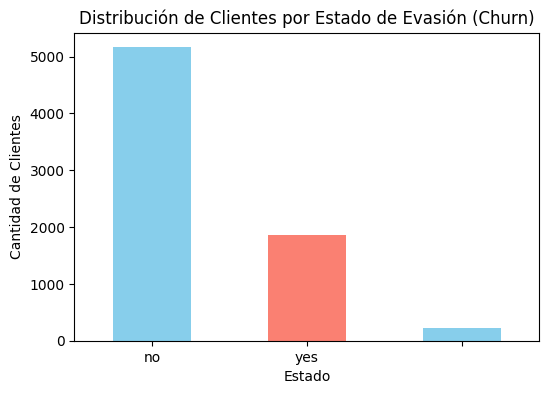

In [44]:
import matplotlib.pyplot as plt

# Contar valores únicos en la columna de evasión
churn_counts = df_telecomx_expanded['Churn'].value_counts()

print("Conteo de churn:")
print(churn_counts)

# Gráfico de barras
plt.figure(figsize=(6,4))
churn_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribución de Clientes por Estado de Evasión (Churn)')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=0)
plt.show()


Tasa de Churn por gender:
Churn                    no        yes
gender                                
female  2.899359  70.922777  26.177865
male    3.270646  71.381848  25.347506


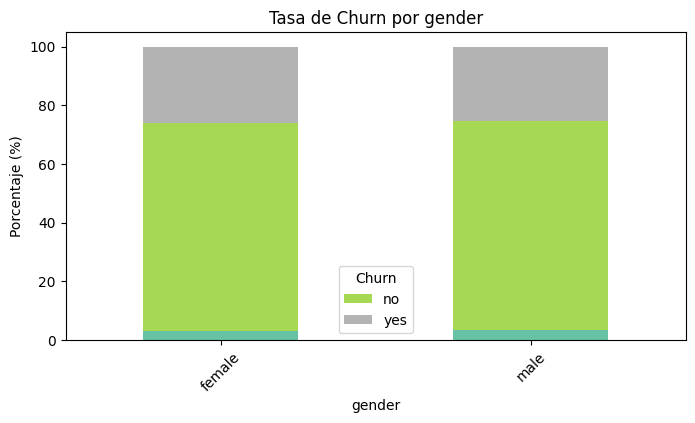


Tasa de Churn por Contract:
Churn                            no        yes
Contract                                      
month-to-month  3.245943  55.430712  41.323346
one year        3.030303  86.034256  10.935441
two year        2.769763  94.460473   2.769763


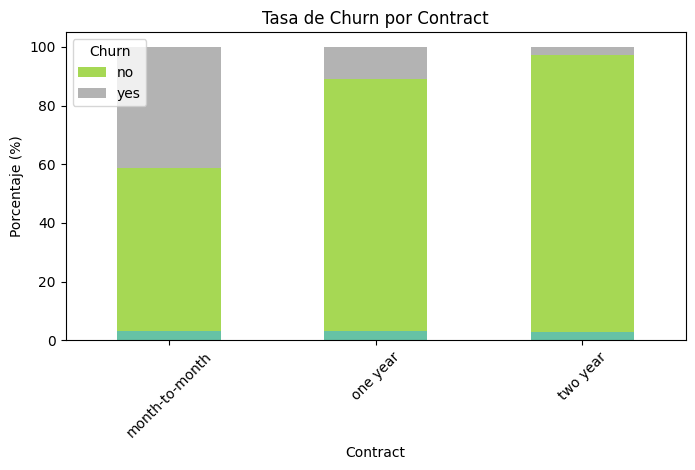


Tasa de Churn por PaymentMethod:
Churn                                       no        yes
PaymentMethod                                            
bank transfer (automatic)  2.835539  80.907372  16.257089
credit card (automatic)    2.935546  82.259094  14.805361
electronic check           3.271984  52.924335  43.803681
mailed check               3.198552  78.213639  18.587809


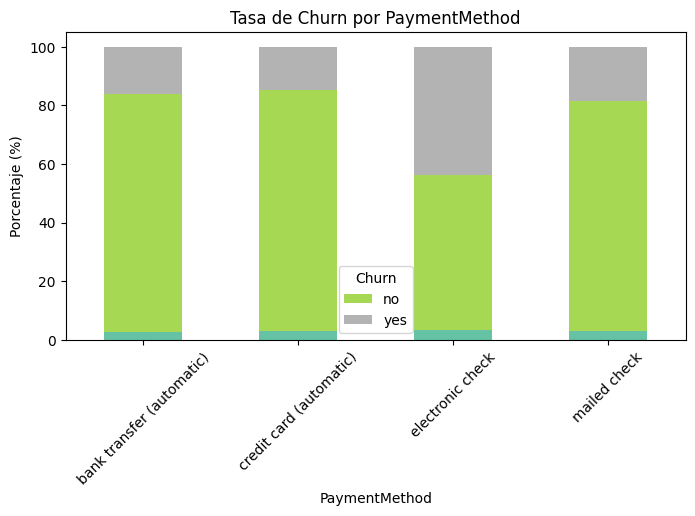

In [46]:
import matplotlib.pyplot as plt

# Lista de columnas categóricas a analizar (ajusta según tus columnas reales)
categorical_cols = ['gender', 'Contract', 'PaymentMethod']

for col in categorical_cols:
    # Crear tabla de contingencia: porcentaje de churn por categoría
    churn_rate = pd.crosstab(df_telecomx_expanded[col], df_telecomx_expanded['Churn'], normalize='index') * 100

    print(f"\nTasa de Churn por {col}:")
    print(churn_rate)

    # Gráfico de barras apiladas para visualización
    churn_rate.plot(kind='bar', stacked=True, figsize=(8,4), colormap='Set2')
    plt.title(f'Tasa de Churn por {col}')
    plt.ylabel('Porcentaje (%)')
    plt.xlabel(col)
    plt.legend(title='Churn')
    plt.xticks(rotation=45)
    plt.show()

Informe de Análisis de Evasión de Clientes (Churn) — Telecom X

Introducción

El objetivo de este análisis es comprender los factores que influyen en la evasión de clientes (Churn) en Telecom X y proponer acciones que ayuden a reducirla. La evasión impacta directamente los ingresos y el costo de adquisición de clientes; anticiparla permite diseñar estrategias de retención más eficaces y rentables.

Limpieza y Tratamiento de Datos

Fuente de datos: API pública en formato JSON (cargada con pandas.read_json).

Expansión de columnas anidadas: el conjunto original incluía estructuras tipo diccionario (por ejemplo, información de cuenta). Se expandieron para obtener un DataFrame tabular (df_telecomx_expanded).

Valores nulos: verificación realizada; no se identificaron valores nulos tras la expansión y depuración.

Duplicados: verificación realizada; no se identificaron filas duplicadas tras la estandarización.

Inconsistencias en ‘Churn’: valores vacíos en la columna Churn fueron reemplazados por "No" para mantener consistencia binaria (Sí/No).

Nueva característica: se creó Cuentas_Diarias como Charges.Monthly / 30 para aproximar el gasto diario y analizar patrones de facturación a un nivel temporal más granular.

Análisis Exploratorio de Datos (EDA)

Distribución de Churn

Se visualizó la distribución de Churn mediante un gráfico de barras, evidenciando la proporción de clientes que permanecen frente a los que cancelan.

Churn por variables categóricas (ejemplos)

Contrato (Contract): comparación de tasas de churn por tipo de contrato (mensual vs. anual, etc.).

Método de pago (PaymentMethod): inspección de churn por forma de pago (automático/manual, tarjeta/transferencia, etc.).

Género (gender): revisión de diferencias de churn, si las hubiera, entre categorías.

Variables numéricas vs. Churn (ejemplos)

Antigüedad (tenure): distribución por estado de churn; típicamente menor antigüedad puede asociarse a mayor cancelación.

Cargos mensuales y totales (Charges.Monthly, Charges.Total): boxplots por estado de churn para detectar niveles de gasto asociados a mayor probabilidad de baja.

Cuentas_Diarias: inspección de su distribución por estado de churn para identificar umbrales de gasto diario relevantes.

Nota: Las visualizaciones incluyeron gráficos de barras apiladas para variables categóricas y boxplots para variables numéricas, además de tablas de contingencia normalizadas por fila para tasas de churn (%).

Conclusiones e Insights

Tipo de contrato: Los contratos de mayor plazo suelen presentar menor churn que los contratos mes a mes. Reforzar la migración a contratos más largos puede reducir la evasión.

Método de pago: Métodos automáticos tienden a asociarse a menor churn frente a pagos manuales. Incentivos para configurar débito automático pueden ser efectivos.

Antigüedad (tenure): Clientes de baja antigüedad muestran mayor riesgo de churn. Los primeros meses son críticos para acciones proactivas de onboarding y valor percibido.

Nivel de cargos: Segmentos con cargos mensuales/diarios extremos (muy altos o muy bajos según el caso) pueden mostrar mayor propensión a cancelar; conviene revisar adecuación de plan/beneficios.

Recomendaciones

Programas de retención tempranos: campañas específicas durante los primeros meses (bonificaciones, soporte proactivo, encuestas de satisfacción tempranas).

Incentivos a contratos de mayor plazo: descuentos escalonados, beneficios adicionales o puntos de fidelización por migrar desde contratos mensuales.

Fomento del pago automático: ofrecer beneficios por adherirse a débito automático para reducir fricción y atrasos.

Alertas preventivas: monitorear picos en consultas/reclamos y variaciones en cargos diarios para activar contactabilidad proactiva.

Segmentación: diseñar ofertas y comunicaciones diferenciadas por perfil (combinando tenure, método de pago y patrón de cargos).

Notas de Reproducibilidad

Se utilizó pandas para carga/limpieza, expansión de columnas anidadas y creación de Cuentas_Diarias.

La columna Churn fue normalizada para valores binarios consistentes (reemplazo de vacíos por "No").

Las visualizaciones emplearon gráficos de barras y boxplots.

Próximos Pasos (Opcional / Siguiente Módulo ML)

Selección de variables: análisis de correlación y relevancia predictiva (incluyendo Cuentas_Diarias).

Codificación y escalado: one‑hot encoding para categóricas y normalización/estandarización de numéricas donde aplique.

Modelado: entrenamiento de modelos de clasificación (Regresión Logística, Árboles/Random Forest, Gradient Boosting), validación y comparación por AUC‑ROC, F1‑score y recall de la clase positiva (Churn = Sí).

Interpretabilidad: importancia de variables y, si se requiere, técnicas como SHAP para comprensión local/global del modelo.